# Unit 2 Lesson 1 Project 8
## Challenge: Prepare a Dataset for Modeling
<div style="text-align: right"> AE Simpson </div>

> ### Select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using univariate and bivariate methods.
> ### Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.
> ### Finally, use filtering methods to select the five best features and justify your choices.

> ### The Data
> 1000 of the most popular IMDB movies between 2006 and 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_style("white")

In [2]:
df = pd.read_csv('IMDB-Movie-Data.csv')

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


> #### Categorical
> - Title
> - Genre
> - Description
> - Director
> - Actors


> #### Continuous
> - Rank
> - Year
> - Runtime
> - Rating
> - Votes
> - Metascore

> #### Outcome
> - Revenue

### Exploring The Data

In [3]:
print(df.columns)
print(df.shape)
print(df.dtypes)
df.describe()

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')
(1000, 12)
Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [4]:
# Check for null values
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [5]:
# Remove null values
df = df.dropna()

In [6]:
# Rename columns for easier reference
df.rename(columns={'Runtime (Minutes)':'Runtime', 'Revenue (Millions)': 'Revenue'}, 
          inplace=True)

/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


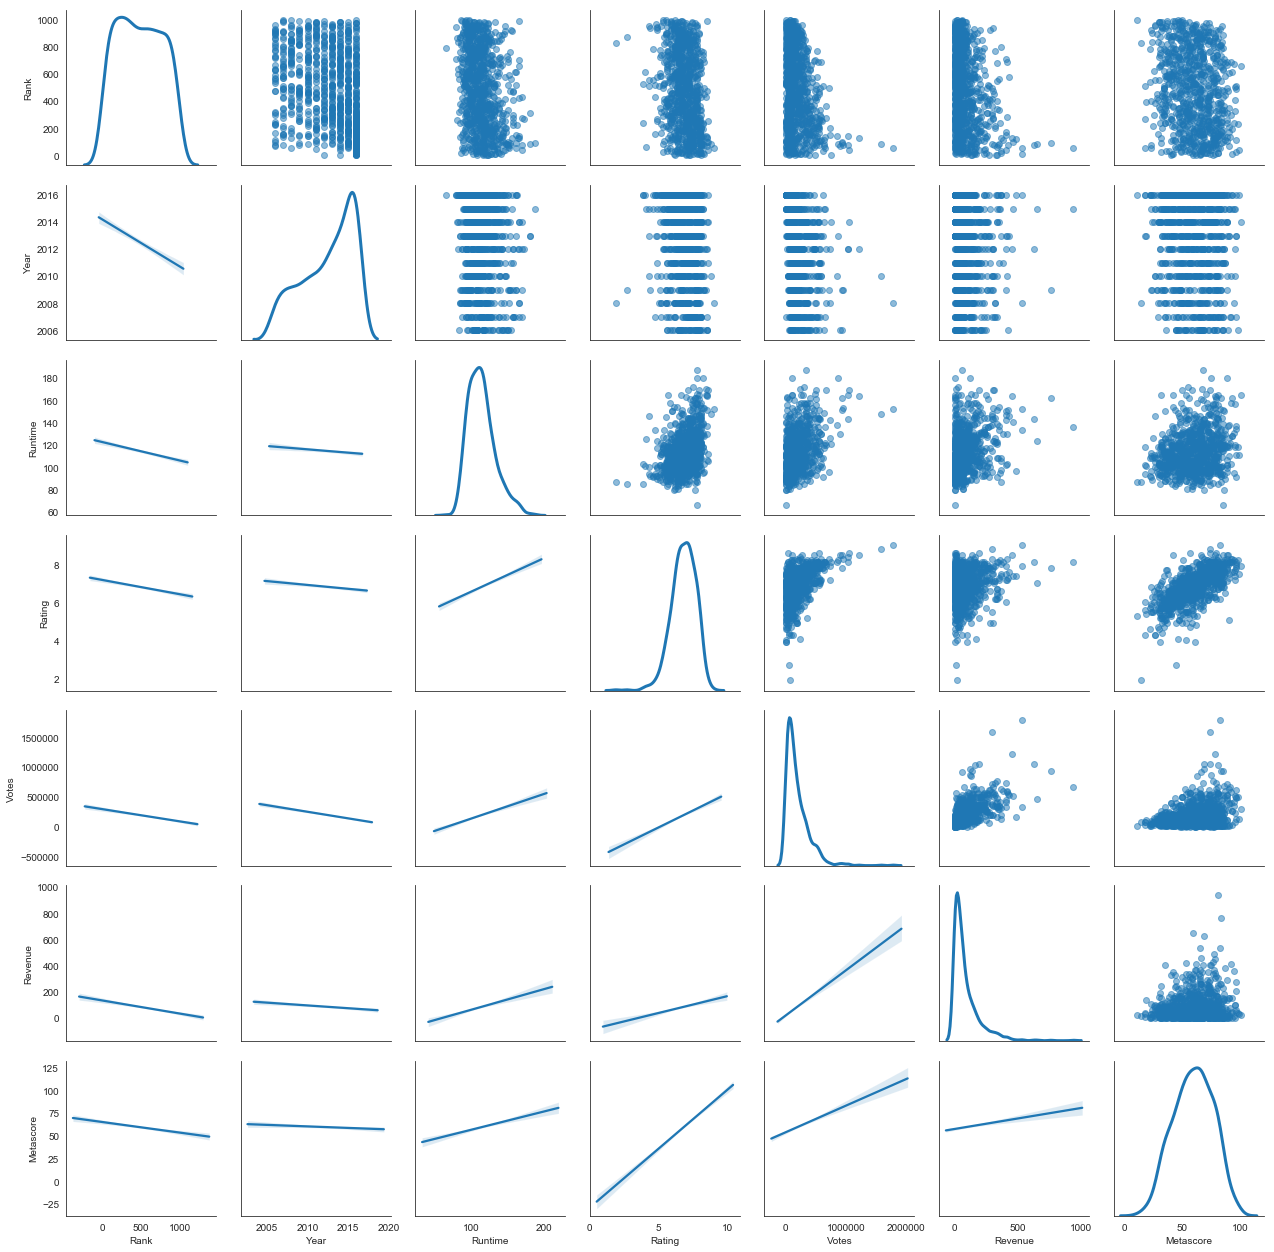

In [7]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

               Rank      Year   Runtime    Rating     Votes   Revenue  \
Rank       1.000000 -0.312809 -0.254783 -0.243125 -0.303284 -0.273170   
Year      -0.312809  1.000000 -0.101933 -0.145703 -0.362445 -0.129198   
Runtime   -0.254783 -0.101933  1.000000  0.374566  0.399298  0.281721   
Rating    -0.243125 -0.145703  0.374566  1.000000  0.517452  0.217106   
Votes     -0.303284 -0.362445  0.399298  0.517452  1.000000  0.636833   
Revenue   -0.273170 -0.129198  0.281721  0.217106  0.636833  1.000000   
Metascore -0.195909 -0.062303  0.221397  0.672731  0.332674  0.142397   

           Metascore  
Rank       -0.195909  
Year       -0.062303  
Runtime     0.221397  
Rating      0.672731  
Votes       0.332674  
Revenue     0.142397  
Metascore   1.000000  


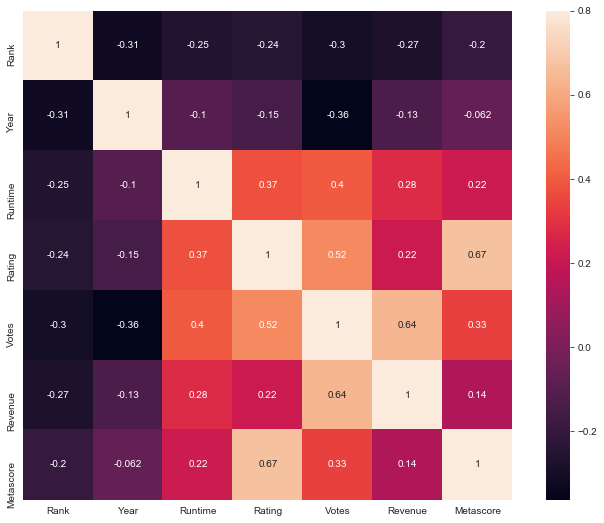

In [8]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
plt.show()

#### Categorical data that may drive revenue: <br> The genre, the director, and the lead actor

In [9]:
# Show the how many directors there are compared to how many movies
print('directors with the most movies:\n',df['Director'].value_counts(dropna=False)[:5])
print('\n Unique Directors: ',df['Director'].nunique())
print('Unique Movie Titles: ',df['Title'].nunique())

directors with the most movies:
 Ridley Scott          8
David Yates           6
Paul W.S. Anderson    6
Michael Bay           6
Christopher Nolan     5
Name: Director, dtype: int64

 Unique Directors:  524
Unique Movie Titles:  837


In [10]:
# Create new columns for each genre

# new data frame with split value columns 
new = df["Genre"].str.split(",", n = 2, expand = True) 
  
# making seperate first genre column from new data frame 
df["First_Genre"]= new[0] 
  
# making seperate second genre column from new data frame 
df["Second_Genre"]= new[1] 

# making seperate third genre column from new data frame 
df["Third_Genre"]= new[2]
  
# Dropping old Genre column 
df.drop(columns =["Genre"], inplace = True) 
  
# dataframe display 
df.head(2)

,Rank,Title,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,First_Genre,Second_Genre,Third_Genre
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi


In [11]:
# df['First_Genre'].nunique()
df['First_Genre'].value_counts(dropna=False)

Action       268
Comedy       151
Drama        148
Adventure     68
Biography     55
Crime         53
Animation     45
Horror        34
Mystery       11
Fantasy        2
Sci-Fi         2
Thriller       1
Name: First_Genre, dtype: int64

In [12]:
df['Second_Genre'].value_counts(dropna=False)

Drama        198
Adventure    168
NaN           66
Romance       59
Comedy        58
Crime         54
Thriller      41
Mystery       39
Horror        35
Fantasy       32
Family        26
Sci-Fi        21
Biography     10
Action         9
Music          8
History        7
Sport          3
War            2
Musical        1
Western        1
Name: Second_Genre, dtype: int64

/Users/research/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


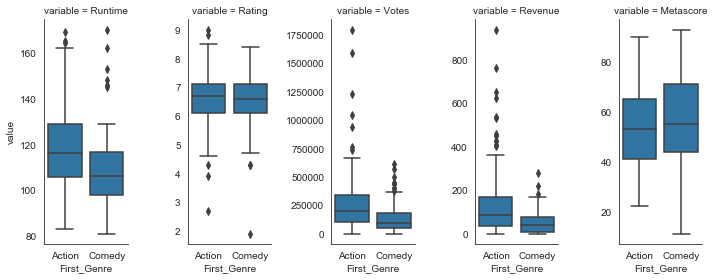

            Metascore                                                      \
                count       mean        std   min   25%   50%   75%   max   
First_Genre                                                                 
Action          268.0  53.533582  15.251536  22.0  41.0  53.0  65.0  90.0   
Comedy          151.0  56.364238  18.221410  11.0  44.0  55.0  71.0  93.0   

            Rating              ...     Runtime         Votes                 \
             count      mean    ...         75%    max  count           mean   
First_Genre                     ...                                            
Action       268.0  6.626866    ...       129.0  169.0  268.0  250562.089552   
Comedy       151.0  6.562252    ...       116.5  170.0  151.0  130400.794702   

                                                                             
                       std    min       25%       50%        75%        max  
First_Genre                                              

In [13]:
# Looking at Categorical bivariate 

df_genr = df.loc[
    ((df['First_Genre'] == 'Action') | (df['First_Genre'] == 'Comedy')),
    ['First_Genre', 'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore']
]

# Plot all the variables with boxplots for the top two genres

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_genr
df_long = pd.melt(df_long, id_vars=['First_Genre'])

g = sns.FacetGrid(df_long, col="variable", sharey=False, size=4, aspect=.5) #don't share y axis to show proper scale
g = g.map(sns.boxplot, "First_Genre", "value")
plt.show()

# Descriptive statistics by group.
print(df_genr.groupby('First_Genre').describe())

# Test whether group differences are significant.
for col in df_genr.loc[:,'Runtime':'Metascore'].columns:
    print(col)
    print(stats.ttest_ind(
        df_genr[df_genr['First_Genre'] == 'Action'][col].dropna(),
        df_genr[df_genr['First_Genre'] == 'Comedy'][col].dropna()
    ))

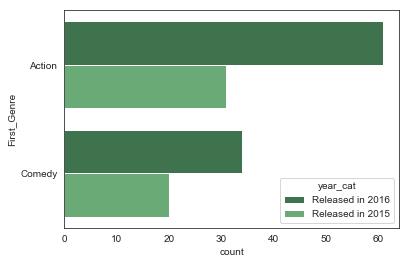

year_cat     Released in 2015  Released in 2016
First_Genre                                    
Action                     31                61
Comedy                     20                34
Power_divergenceResult(statistic=24.904109589041095, pvalue=1.616996712927718e-05)


In [14]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['First_Genre'] == 'Action') | (df['First_Genre'] == 'Comedy')) & (df['Year'] >= 2015),
    ['First_Genre','Year']
]

# Create a text variable so that output is easier to interpret.
df_2cat['Year_cat'] = None
df_2cat.loc[df_2cat['Year'] == 2015, 'year_cat'] = 'Released in 2015'
df_2cat.loc[df_2cat['Year'] == 2016, 'year_cat'] = 'Released in 2016'

# Plot counts for each combination of levels.
sns.countplot(y="First_Genre", hue="year_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['First_Genre'], df_2cat['year_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

#### Rating has the most variance amongst genres, and the year matters for the number of films made by type.

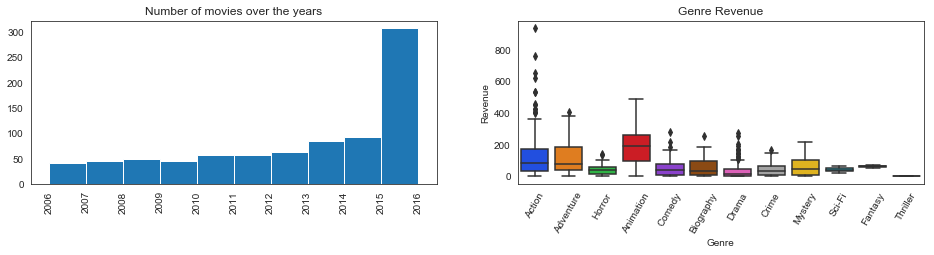

In [15]:
fig = plt.figure(figsize=(16,12))
fig.subplots_adjust(hspace=.5)

# Movies per Year
g = fig.add_subplot(3,2,1)
plt.title("Number of movies over the years")
plt.xticks(range(2005,2019),rotation=90)
plt.hist(df.Year)

# How much money did each genre make
g = fig.add_subplot(3,2,2)
ax = sns.boxplot(x=df['First_Genre'], 
               y=df['Revenue'],
               data=df,
               palette='bright')
# sns.despine(trim=True, left=True, bottom=True)

g.set(xlabel='Genre', ylabel='Revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

plt.title('Genre Revenue')
plt.show()

In [16]:
# Create new columns for first actor

# new data frame with split value columns 
new = df["Actors"].str.split(",", n = 1, expand = True) 
  
# making seperate first genre column from new data frame 
df["First_Actor"]= new[0] 
  
# making seperate second genre column from new data frame 
df["Support_Actors"]= new[1] 
  
# Dropping old Actor column 
df.drop(columns =["Actors"], inplace = True) 
  
# dataframe display 
df 

,Rank,Title,Description,Director,Year,Runtime,Rating,Votes,Revenue,Metascore,First_Genre,Second_Genre,Third_Genre,First_Actor,Support_Actors
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,"Vin Diesel, Bradley Cooper, Zoe Saldana"
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,"Logan Marshall-Green, Michael Fassbender, Cha..."
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,James McAvoy,"Anya Taylor-Joy, Haley Lu Richardson, Jessica..."
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,"Reese Witherspoon, Seth MacFarlane, Scarlett J..."
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,"Jared Leto, Margot Robbie, Viola Davis"
5,6,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,2016,103,6.1,56036,45.13,42.0,Action,Adventure,Fantasy,Matt Damon,"Tian Jing, Willem Dafoe, Andy Lau"
6,7,La La Land,A jazz pianist falls for an aspiring actress i...,Damien Chazelle,2016,128,8.3,258682,151.06,93.0,Comedy,Drama,Music,Ryan Gosling,"Emma Stone, Rosemarie DeWitt, J.K. Simmons"
8,9,The Lost City of Z,"A true-life drama, centering on British explor...",James Gray,2016,141,7.1,7188,8.01,78.0,Action,Adventure,Biography,Charlie Hunnam,"Robert Pattinson, Sienna Miller, Tom Holland"
9,10,Passengers,A spacecraft traveling to a distant colony pla...,Morten Tyldum,2016,116,7.0,192177,100.01,41.0,Adventure,Drama,Romance,Jennifer Lawrence,"Chris Pratt, Michael Sheen,Laurence Fishburne"
10,11,Fantastic Beasts and Where to Find Them,The adventures of writer Newt Scamander in New...,David Yates,2016,133,7.5,232072,234.02,66.0,Adventure,Family,Fantasy,Eddie Redmayne,"Katherine Waterston, Alison Sudol,Dan Fogler"


In [17]:
print('Number of Actors:', df['First_Actor'].nunique())
# Top 25 actors by movie appearances
print('Most Appearances:\n', df['First_Actor'].value_counts(dropna=False)[:25])
print('\n Unique Actors: ',df['First_Actor'].nunique())

Number of Actors: 431
Most Appearances:
 Christian Bale         11
Mark Wahlberg          11
Brad Pitt               9
Leonardo DiCaprio       9
Jake Gyllenhaal         9
Robert Downey Jr.       8
Denzel Washington       8
Tom Hanks               8
Adam Sandler            8
Will Smith              8
Daniel Radcliffe        7
Johnny Depp             7
Tom Hardy               7
Tom Cruise              7
Jennifer Lawrence       6
Michael Fassbender      6
Hugh Jackman            6
Chris Hemsworth         6
Will Ferrell            6
Seth Rogen              6
Kristen Stewart         6
Chris Pine              6
Matthew McConaughey     6
Vin Diesel              6
Sylvester Stallone      6
Name: First_Actor, dtype: int64

 Unique Actors:  431


### Feature Engineering

#### Combining two highly correlated variables that are also similar. <br> Both are ratings but between the general public and professional critics.

In [18]:
# Calculate the average between rating and metascore
r = df['Rating']
m = df['Metascore']
rating_meta = ((r * 10) + m) / 2 

df['Rated_Meta'] = rating_meta

df.head(2)

,Rank,Title,Description,Director,Year,Runtime,Rating,Votes,Revenue,Metascore,First_Genre,Second_Genre,Third_Genre,First_Actor,Support_Actors,Rated_Meta
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,"Vin Diesel, Bradley Cooper, Zoe Saldana",78.5
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,"Logan Marshall-Green, Michael Fassbender, Cha...",67.5


#### Add a popularity feature. <br> Many movies are rated highly by the public and in large numbers (many views/votes). <br> Combinging those aspects can show that even though the critic score and rank may be low, people still liked the movie.

In [19]:
# create a popularity feature (more votes & higher ratings = more money)

avg_votes = df['Votes'].mean()
avg_rating = df['Rated_Meta'].mean()

df['Popularity'] = np.where((df['Votes'] > avg_votes) & 
                            (df['Rated_Meta'] > avg_rating), 
                             "High", "Low")

df.head(2)

,Rank,Title,Description,Director,Year,Runtime,Rating,Votes,Revenue,Metascore,First_Genre,Second_Genre,Third_Genre,First_Actor,Support_Actors,Rated_Meta,Popularity
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,"Vin Diesel, Bradley Cooper, Zoe Saldana",78.5,High
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,"Logan Marshall-Green, Michael Fassbender, Cha...",67.5,High


#### Do movies that are popular bring in significantly more money than unpopular movies?

/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Revenue: Popular and Unpopular')

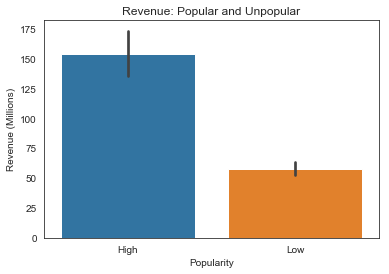

In [20]:
g = sns.barplot("Popularity", "Revenue", data=df)

g.set(ylabel='Revenue (Millions)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.title('Revenue: Popular and Unpopular')

#### One-hot-encoding categorical data

In [21]:
# Making dummies.
# Also creating a data frame to hold our new features.
features1 = pd.get_dummies(df['First_Genre'])

# Grouping Genres and one-hot-encoding them
features1['Fantasy_Adventure'] = np.where((df['First_Genre'].isin(['Adventure', 'Fantasy'])), 1, 0)
features1['Horror_SciFi'] = np.where((df['First_Genre'].isin(['Thriller', 'Horror', 'Mystery', 'Sci-Fi'])), 1, 0)
features1['Drama_Bio'] = np.where((df['First_Genre'].isin(['Drama', 'Biography', 'Crime'])), 1, 0)
features1['Action'] = np.where((df['First_Genre'].isin(['Action'])), 1, 0)
features1['Animation'] = np.where((df['First_Genre'].isin(['Animation'])), 1, 0)
features1['Comedy'] = np.where((df['First_Genre'].isin(['Comedy'])), 1, 0)

# Drop old categories (ungrouped)
features1.drop(columns =['Adventure', 'Biography', 'Fantasy', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'Drama', 'Crime'], inplace = True)

features1.head()

,Action,Animation,Comedy,Fantasy_Adventure,Horror_SciFi,Drama_Bio
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [22]:
features2 = pd.get_dummies(df['Popularity'])

features2.head()

,High,Low
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


#### Create a new dataframe to append one-hot-encoded features and remove insignificant columns

In [23]:
df_selected = df

In [24]:
# Add the one-hot-encoded popularity columns
df_selected = pd.concat([df_selected, features2], axis=1)

# Dropping old Popularity column 
df_selected.drop(columns =["Popularity"], inplace = True)

In [25]:
# Add the genre dummies to the selected df
df_selected = pd.concat([df_selected, features1], axis=1)

#### All of the features

In [26]:
df_selected.columns

Index(['Rank', 'Title', 'Description', 'Director', 'Year', 'Runtime', 'Rating',
       'Votes', 'Revenue', 'Metascore', 'First_Genre', 'Second_Genre',
       'Third_Genre', 'First_Actor', 'Support_Actors', 'Rated_Meta', 'High',
       'Low', 'Action', 'Animation', 'Comedy', 'Fantasy_Adventure',
       'Horror_SciFi', 'Drama_Bio'],
      dtype='object')

#### Look at correlations with the new features

               Rank      Year   Runtime    Rating     Votes   Revenue  \
Rank       1.000000 -0.312809 -0.254783 -0.243125 -0.303284 -0.273170   
Year      -0.312809  1.000000 -0.101933 -0.145703 -0.362445 -0.129198   
Runtime   -0.254783 -0.101933  1.000000  0.374566  0.399298  0.281721   
Rating    -0.243125 -0.145703  0.374566  1.000000  0.517452  0.217106   
Votes     -0.303284 -0.362445  0.399298  0.517452  1.000000  0.636833   
Revenue   -0.273170 -0.129198  0.281721  0.217106  0.636833  1.000000   
Metascore -0.195909 -0.062303  0.221397  0.672731  0.332674  0.142397   

           Metascore  
Rank       -0.195909  
Year       -0.062303  
Runtime     0.221397  
Rating      0.672731  
Votes       0.332674  
Revenue     0.142397  
Metascore   1.000000  


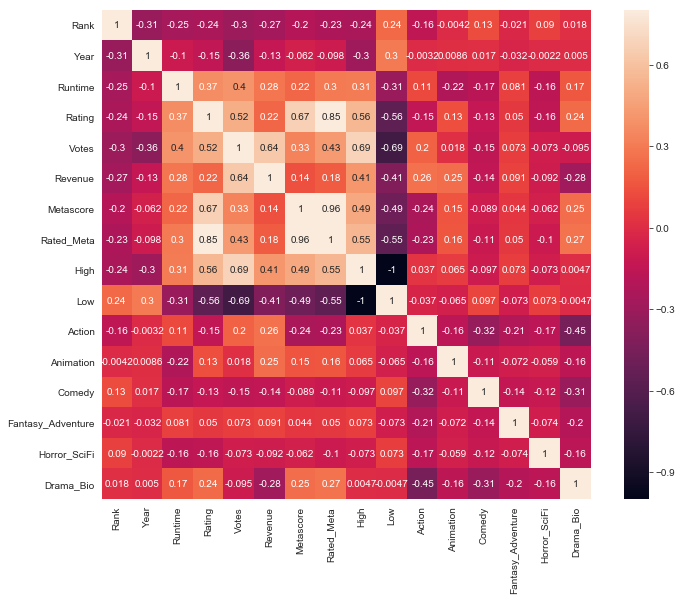

In [27]:
# Make the correlation matrix.
corrmat2 = df_selected.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, annot=True, vmax=.8, square=True)
plt.show()

### Feature Selection with PCA

In [28]:
#Choosing the variables for PCA
feats = df_selected[['Rank', 'Year', 'Runtime', 'Votes', 'Revenue', 'Rated_Meta', 'High', 'Low', 'Action', 'Animation', 'Comedy', 'Fantasy_Adventure', 'Horror_SciFi', 'Drama_Bio']]

# First center and scale the data
scaled_data = StandardScaler().fit_transform(feats)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

In [29]:
var_feat = ['Rank', 'Year', 'Runtime', 'Votes', 'Rated_Meta', 'High', 'Low', 'Action', 'Animation', 'Comedy', 'Fantasy_Adventure', 'Horror_SciFi', 'Drama_Bio']
target = ['Revenue']
# Separating out the features
x = feats.loc[:, var_feat].values
# Separating out the target
y = feats.loc[:,target].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

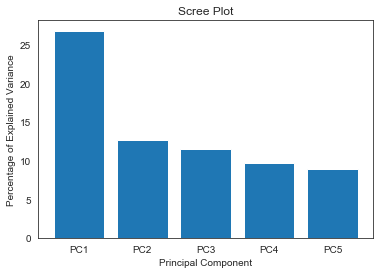

In [35]:
# Draw a scree plot and a PCA plot
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#### Because there are so many samples, the following  2 component PCA visualization shows only 15% of the data for clarity.

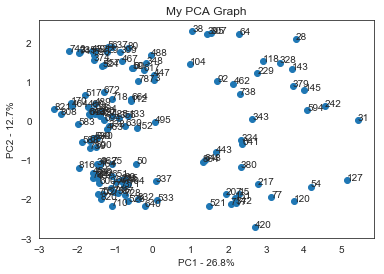

In [36]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data)

df_sample = pca_df.sample(frac=0.15)

plt.scatter(df_sample[0], df_sample[1])
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in df_sample.index:
    plt.annotate(sample, (df_sample[0].loc[sample], df_sample[1].loc[sample]))
 
plt.show()

In [37]:
# create a dataframe of the top 5 components
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = labels)

In [38]:
# concatenate the top 5 components with the outcome variable
finalDf = pd.concat([principalDf, feats[['Revenue']]], axis = 1)

In [39]:
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,Revenue
0,3.777169,1.869491,-0.553076,0.914599,0.027101,333.13
1,3.095687,0.374210,0.178157,0.799766,-1.401696,126.46
2,-0.783130,0.162496,-0.546333,1.238480,1.372595,138.12
3,-0.721183,-0.311083,-0.257246,3.990541,1.451398,270.32
4,-0.185007,2.376825,-1.648926,0.593416,-0.096079,325.02


#### The top 5 features the contributed most to PC1

In [40]:
# Determine which features had the biggest influence on PC1 (Rank)

 
## get the names of the top 5 measurements (IMDB features) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=var_feat)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 5 features
top_5_features = sorted_loading_scores[1:6].index.values #the first feature is low_pop which is the same as high
 
## print the feature names and their scores
print(loading_scores[top_5_features])

Low          -0.489085
Votes         0.445485
Rated_Meta    0.367886
Runtime       0.283796
Rank         -0.200854
dtype: float64
